(content:chapter:superposition)=

# Superposition

In [1]:
import schemdraw.elements as elm
import schemdraw
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


```{index} Superposition

```

Superposition is the first circuit theorem we will study. It is not an efficient method of circuit analysis but at times it is the only option to analyze a circuit. The examples here could be analyzed as we have in previous chapter and do not require the application of superposition. However, these examples serve as a stepping stone before we consider more complex circuits that do require superposition. Beyond that it is an important theoretical concept for some of the more advanced analysis methods you will learn if you continue your studies.

The superposition theorem tell us that any voltage or current in a circuit is the algebraic sum of the voltages and currents caused by each independent supply by itself. In practice, this means we have to analyze a circuit once for each independent supply in the circuit. The process is detailed below and then applied to a number of examples.

## The Steps

I'm going to list the steps here as reference. Use these steps as we walk through the next example.

```{admonition} Steps for Superposition
1.  Select each independent supply in turn.
1.  Replace all other independent sources with their ideal sources.
1.  Solve for the desired value using the polarity/direction marked in the original problem.
1.  Repeat for each independent source.
1.  Algebraically sum the values from each individual supply.
```

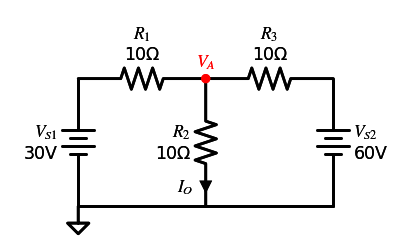

In [2]:
with schemdraw.Drawing(file='super-example.svg') as d:
    d += (Vs1 := elm.Battery().up().label('$V_{S1}$\n30V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += (Vs2 := elm.Battery().down().label('$V_{S2}$\n60V', loc='bottom'))
    d += (LineB := elm.Line().left().tox(Vs1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O$')
    d += elm.Dot().color('red').at(R2.start).label('$V_A$')

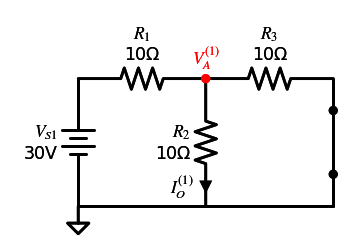

In [3]:
with schemdraw.Drawing(file='super-example-sub1.svg') as d:
    d += (Vs1 := elm.Battery().up().label('$V_{S1}$\n30V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += elm.LineDot().down().length(d.unit/4)
    d += elm.LineDot().down().length(d.unit/2)
    d += elm.Line().down().length(d.unit/4)
    d += (LineB := elm.Line().left().tox(Vs1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O^{(1)}$')
    d += elm.Dot().color('red').at(R2.start).label('$V_A^{(1)}$')

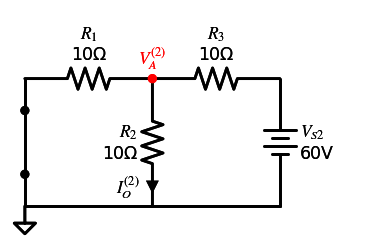

In [4]:
with schemdraw.Drawing(file='super-example-sub2.svg') as d:
    d += elm.LineDot().up().length(d.unit/4)
    d += elm.LineDot().up().length(d.unit/2)
    d += elm.Line().up().length(d.unit/4)
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += (Vs2 := elm.Battery().down().label('$V_{S2}$\n60V', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top'))
    d += elm.CurrentLabelInline(direction='in', ofst=0.3).at(R2.end).label('$I_O^{(2)}$')
    d += elm.Dot().color('red').at(R2.start).label('$V_A^{(2)}$')

`````{admonition} Example

Find $I_{O}$ using superposition.
```{figure} super-example.svg
---
height: 300px
name: super-example
---
````

````{admonition} Solution
:class: tip, dropdown
The circuit has two <u>independent</u> supplies (doesn't matter whether they are voltage or current supplies) so we analyze the circuit twice.


**Sub-problem \#1**
In the first "sub-problem" we consider the effect of $V_{S1}$ on $I_{O}$. Notice that $V_{S2}$ is replaced by a its ideal resistance, a short in this case. Also notice that the $I_{O}$ labeled in this sub-problem has a superscript indicating it is the result of the first independent supply considered. This is a distinct value for the $I_{O}$ labeled in the original problem.

```{figure} super-example-sub1.svg
---
height: 300px
name: super-example-sub1
---
```

Now we analyze the circuit using any method that will give us the correct answer. I'll use the mesh shortcut here.

$$
 \left[ \begin{array}{cc}
20&-10\\
-10&20\\
\end{array} \right]^{-1}\left[\begin{array}{c}30~V\\0~V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}2~\text{A}\\1~\text{A}\end{array}\right]
$$

$$
I_O^{(1)}=I_1-I_2=(2-1)=1~\text{A}
$$

**Sub-problem \#2**
In the second "sub-problem" we consider the effect of $V_{S2}$ on $I_{O}$. $I_{O}$ in this problem is labeled I$_O^{(2)}$ as it is the output current caused by the second independent supply. $V_{S1}$ is replaced by its ideal resistance.

```{figure} super-example-sub2.svg
---
height: 300px
name: super-example-sub2
---
```

Again, we analyze the circuit using any method that will give us the correct answer. Again, I'll use the mesh shortcut here.

$$
 \left[ \begin{array}{cc}
20&-10\\
-10&20\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~V\\-60~V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-2~\text{A}\\-4~\text{A}\end{array}\right]
$$

$$
I_O^{(2)}=I_1-I_2=(-2-(-4))=2~\text{A}
$$

**Summing the Results**
Finally we take the results from the sub-problems and algebraically sum them.

$$
I_O=I_O^{(1)}+I_O^{(2)}=1~\text{A}+2~\text{A}=3~\text{A}
$$

I encourage you to analyze the original circuit using mesh or nodal analysis to confirm this result. You'll finish much faster but remember that this is a toy problem intended to teach you the superposition theorem. It is not intended to provided you with quick results.

`````

The next problem is similar but let's find a voltage in the circuit. Also, let's examine how do we treat current supplies when using superposition.

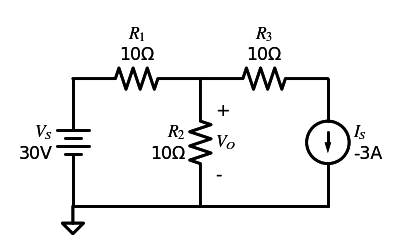

In [5]:
with schemdraw.Drawing(file='super-example-current-supply.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n30V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += (Is := elm.SourceI().down().label('$I_{S}$\n-3A', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top').label(('+','$V_O$','-'),loc='bottom'))

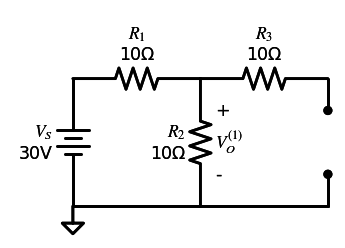

In [6]:
with schemdraw.Drawing(file='super-example-current-supply-sub1.svg') as d:
    d += (Vs := elm.Battery().up().label('$V_{S}$\n30V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += elm.LineDot().down().length(d.unit/4)
    d += (Is := elm.Gap().down().length(d.unit/2))
    d += elm.LineDot().down().length(d.unit/4).reverse()
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top').label(('+','$V_O^{(1)}$','-'),loc='bottom'))

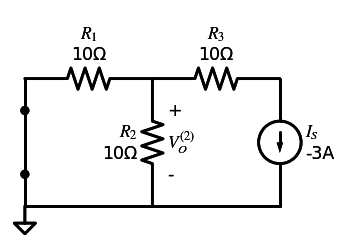

In [7]:
with schemdraw.Drawing(file='super-example-current-supply-sub2.svg') as d:
    d += elm.LineDot().up().length(d.unit/4)
    d += elm.LineDot().up().length(d.unit/2)
    d += elm.Line().up().length(d.unit/4)

    d += (R1 := elm.Resistor().right().label('$R_{1}$\n10Ω', loc='top'))
    d += (R3 := elm.Resistor().right().label('$R_{3}$\n10Ω', loc='top'))
    d += (Is := elm.SourceI().down().label('$I_{S}$\n-3A', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n10Ω', loc='top').label(('+','$V_O^{(2)}$','-'),loc='bottom'))

`````{admonition} Example

```{figure} super-example-current-supply.svg
---
height: 300px
name: super-example-current-supply
---
````

````{admonition} Solution
:class: tip, dropdown

%agraph{Sub-problem \#1}
**Sub-problem \#1**
In the first "sub-problem" we consider the effect of $V_{S}$ on $V_{O}$. Notice that $I_{S}$ is replaced by a its ideal resistance, an open in this case.

```{figure} super-example-current-supply-sub1.svg
---
height: 300px
name: super-example-current-supply-sub1
---
```

It is possible to use a simple voltage divider to analyze this circuit. For consistency I will write the KVL using the mesh analysis shortcut. This sub-problem only has a single mesh and no current supplies so analysis involves a single KVL. The shortcut only requires a 1x1 matrix and a 1x1 vector. It feels silly... but it works.

$$
 \left[20\right]^{-1}\left[30~V\right]=\left[I_1\right]=\left[1.5~\text{A}\right]
$$

$$
V_O^{(1)}=I(R_2)=1.5(10)=15~V
$$

**Sub-problem \#2**
The second sub-problem we consider the effect of $I_{S}$ on $V_{O}$.

```{figure} super-example-current-supply-sub2.svg
---
height: 300px
name: super-example-current-supply-sub2
---
```

$$
 \left[ \begin{array}{cc}
20&-10\\
0&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~V\\-3~\text{A}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-1.5~\text{A}\\-3~\text{A}\end{array}\right]
$$

$$
V_O^{(2)}=(I_1-I_2)R_2=(-1.5-(-3))(10~\Omega)=15~V
$$

**Summing the Results**
Finally we take the results from the sub-problems and algebraically sum them.

$$
V_O=V_O^{(1)}+V_O^{(2)}=15~V+15~V=30~V
$$

`````

In the next example I'll increase the number of supplies. Superposition scales, that is to say we simply increase the number of sub-problems. Three, four, five supplies may be workable by hand as I'll show here but many more than that and we should consider using a tool such as MATLAB to perform the analysis. There are circuits that require an infinite number of sub-problems to analyze. Often we will use MATLAB to analyze a large number of the sub-problems in order to approximate an infinite number. But let's not get ahead of ourselves. Let's solve the next one with three supplies.

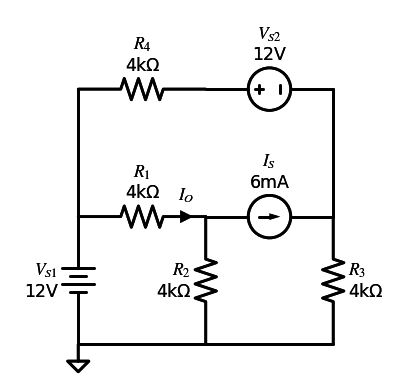

In [8]:
with schemdraw.Drawing(file='super-example-3-supplies.svg') as d:
    d += (Vs1 := elm.Battery().up().label('$V_{S1}$\n12V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ', loc='top'))
    d += (Is := elm.SourceI().right().label('$I_{S}$\n6mA', loc='top'))
    d += (R3 := elm.Resistor().down().label('$R_{3}$\n4kΩ', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n4kΩ', loc='top'))
    d += (LineL := elm.Line().at(R1.start).up())
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n4kΩ', loc='top'))
    d += (Vs2 := elm.SourceV().right().label('$V_{S2}$\n12V', loc='top').reverse())
    d += (LineR := elm.Line().down())
    d += elm.CurrentLabelInline(direction='in', ofst=-1.2).at(R1).label('$I_O$')

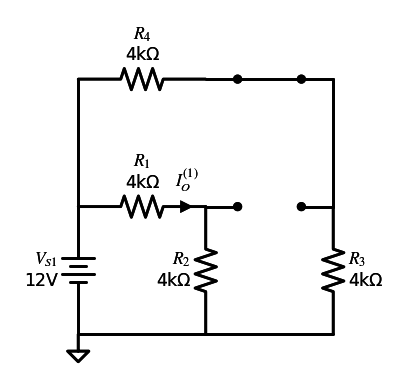

In [9]:
with schemdraw.Drawing(file='super-example-3-supplies-sub1.svg') as d:
    d += (Vs1 := elm.Battery().up().label('$V_{S1}$\n12V', loc='top').reverse())
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ', loc='top'))

    d += elm.LineDot().right().length(d.unit/4)
    d += elm.Gap().right().length(d.unit/2)
    d += elm.LineDot().right().length(d.unit/4).reverse()

    d += (R3 := elm.Resistor().down().label('$R_{3}$\n4kΩ', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n4kΩ', loc='top'))
    d += (LineL := elm.Line().at(R1.start).up())
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n4kΩ', loc='top'))

    d += elm.LineDot().right().length(d.unit/4)
    d += elm.Line().right().length(d.unit/2)
    d += elm.LineDot().right().length(d.unit/4).reverse()

    d += (LineR := elm.Line().down())
    d += elm.CurrentLabelInline(direction='in', ofst=-1.2).at(R1).label('$I_O^{(1)}$')

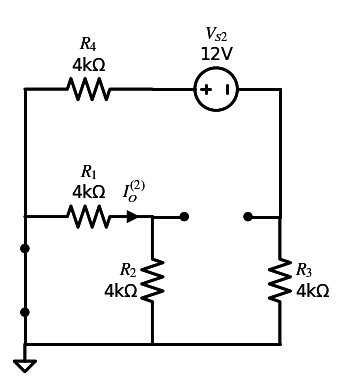

In [10]:
with schemdraw.Drawing(file='super-example-3-supplies-sub2.svg') as d:
    d += elm.LineDot().up().length(d.unit/4)
    d += elm.Line().up().length(d.unit/2)
    d += elm.LineDot().up().length(d.unit/4).reverse()

    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ', loc='top'))

    d += elm.LineDot().right().length(d.unit/4)
    d += elm.Gap().right().length(d.unit/2)
    d += elm.LineDot().right().length(d.unit/4).reverse()

    d += (R3 := elm.Resistor().down().label('$R_{3}$\n4kΩ', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n4kΩ', loc='top'))
    d += (LineL := elm.Line().at(R1.start).up())
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n4kΩ', loc='top'))
    d += (Vs2 := elm.SourceV().right().label('$V_{S2}$\n12V', loc='top').reverse())
    d += (LineR := elm.Line().down())
    d += elm.CurrentLabelInline(direction='in', ofst=-1.2).at(R1).label('$I_O^{(2)}$')

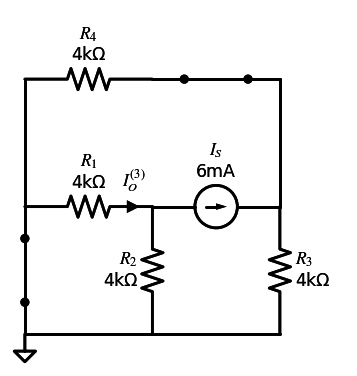

In [11]:
with schemdraw.Drawing(file='super-example-3-supplies-sub3.svg') as d:
    d += elm.LineDot().up().length(d.unit/4)
    d += elm.Line().up().length(d.unit/2)
    d += elm.LineDot().up().length(d.unit/4).reverse()

    d += (R1 := elm.Resistor().right().label('$R_{1}$\n4kΩ', loc='top'))
    d += (Is := elm.SourceI().right().label('$I_{S}$\n6mA', loc='top'))
    d += (R3 := elm.Resistor().down().label('$R_{3}$\n4kΩ', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (R2 := elm.Resistor().at(R1.end).down().label('$R_{2}$\n4kΩ', loc='top'))
    d += (LineL := elm.Line().at(R1.start).up())
    d += (R4 := elm.Resistor().right().label('$R_{4}$\n4kΩ', loc='top'))

    d += elm.LineDot().right().length(d.unit/4)
    d += elm.Line().right().length(d.unit/2)
    d += elm.LineDot().right().length(d.unit/4).reverse()

    d += (LineR := elm.Line().down())
    d += elm.CurrentLabelInline(direction='in', ofst=-1.2).at(R1).label('$I_O^{(3)}$')

`````{admonition} Example

Find $I_{O}$ using superposition.
```{figure} super-example-3-supplies.svg
---
height: 300px
name: super-example-3-supplies
---
````

````{admonition} Solution
:class: tip, dropdown
With three independent supplies we need to consider three sub-problems for this circuit. The order of the sub-problems does not matter, just pick an independent supply and get going. Let's start by considering the effect $V_{S1}$ has on $I_{O}$.

%agraph{Sub-problem \#1}
**Sub-problem \#1**

```{figure} super-example-3-supplies-sub1.svg
---
height: 300px
name: super-example-3-supplies-sub1
---
```

$$
 \left[ \begin{array}{cc}
8k&-8k\\
-8k&16k\\
\end{array} \right]^{-1}\left[\begin{array}{c}12~V\\0~V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}3~\text{mA}\\1.5~\text{mA}\end{array}\right]
$$

$$
I_O^{(1)}=I_1-I_2=3~\text{mA}-1.5~\text{mA}=1.5~\text{mA}
$$

**Sub-problem \#2**

```{figure} super-example-3-supplies-sub2.svg
---
height: 300px
name: super-example-3-supplies-sub2
---
```

$$
 \left[ \begin{array}{cc}
8k&-8k\\
-8k&16k\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~V\\12~V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}1.5~\text{mA}\\1.5~\text{mA}\end{array}\right]
$$

$$
I_O^{(2)}=I_1-I_2=1.5~\text{mA}-1.5~\text{mA}=0~\text{A}
$$

**Sub-problem \#3**

```{figure} super-example-3-supplies-sub3.svg
---
height: 300px
name: super-example-3-supplies-sub3
---
```

$$
 \left[ \begin{array}{ccc}
8k&-4k&-4k\\
0&1&-1\\
-8k&8k&8k\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~V\\6~\text{mA}\\0~V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}0~\text{A}\\3~\text{mA}\\-3~\text{mA}\end{array}\right]
$$

$$
I_O^{(3)}=I_1-I_3=0~\text{A}-(-3~\text{mA})=3~\text{mA}
$$

**Summing the Results**
Finally we take the results from the sub-problems and algebraically sum them.

$$
I_O=I_O^{(1)}+I_O^{(2)}+I_O^{(3)}=1.5~\text{mA}+0~\text{A}+3~\text{mA}=4.5~\text{mA}
$$

`````

## Dependent Supplies

In this last example let's examine how a dependent supply is treated when using superposition.

%Dependant supply example

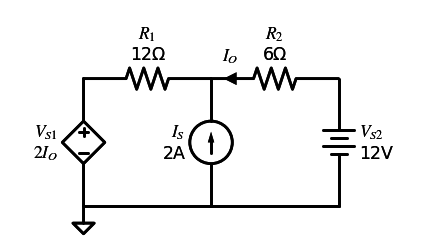

In [12]:
with schemdraw.Drawing(file='super-example-dependent.svg') as d:
    d += (Vs1 := elm.SourceControlledV().up().label('$V_{S1}$\n$2I_O$', loc='top'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n12Ω', loc='top'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n6Ω', loc='top'))
    d += (Vs2 := elm.Battery().down().label('$V_{S2}$\n12V', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is := elm.SourceI().at(R1.end).down().label('$I_{S}$\n2A', loc='top').reverse())
    d += elm.CurrentLabelInline(direction='out', ofst=.9).at(R2).label('$I_O$')

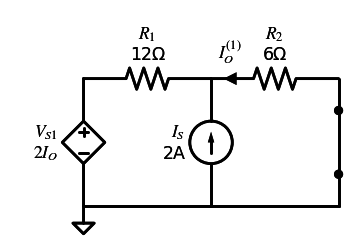

In [13]:
with schemdraw.Drawing(file='super-example-dependent-sub1.svg') as d:
    d += (Vs1 := elm.SourceControlledV().up().label('$V_{S1}$\n$2I_O$', loc='top'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n12Ω', loc='top'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n6Ω', loc='top'))
    d += elm.LineDot().down().length(d.unit/4)
    d += elm.LineDot().down().length(d.unit/2)
    d += elm.Line().down().length(d.unit/4)
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())
    d += (Is := elm.SourceI().at(R1.end).down().label('$I_{S}$\n2A', loc='top').reverse())
    d += elm.CurrentLabelInline(direction='out', ofst=.9).at(R2).label('$I_O^{(1)}$')

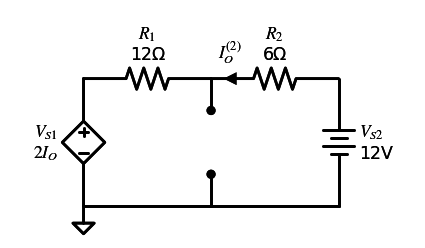

In [14]:
with schemdraw.Drawing(file='super-example-dependent-sub2.svg') as d:
    d += (Vs1 := elm.SourceControlledV().up().label('$V_{S1}$\n$2I_O$', loc='top'))
    d += (R1 := elm.Resistor().right().label('$R_{1}$\n12Ω', loc='top'))
    d += (R2 := elm.Resistor().right().label('$R_{2}$\n6Ω', loc='top'))
    d += (Vs2 := elm.Battery().down().label('$V_{S2}$\n12V', loc='bottom'))
    d += (LineB := elm.Line().left().tox(R1.start))
    d += (GndSig := elm.GroundSignal())

    d += elm.LineDot().at(R1.end).down().length(d.unit/4)
    d += (Is := elm.Gap().down().length(d.unit/2))
    d += elm.LineDot().down().length(d.unit/4).reverse()

    d += elm.CurrentLabelInline(direction='out', ofst=.9).at(R2).label('$I_O^{(2)}$')

`````{admonition} Example

Find $I_{O}$ using superposition.
```{figure} super-example-dependent.svg
---
height: 300px
name: super-example-dependent
---
````

````{admonition} Solution
:class: tip, dropdown
Stop. Ask yourself how many sub-problems you'll need to solve for this circuit. If you said three you're wrong. Count the **independent** supplies to determine how many sub-problems to solve. There are only two in this circuit. When you redraw the circuit the dependent supply should be included in each sub-problem. Look at the circuits below to see an example of this.

**Sub-problem \#1**

```{figure} super-example-dependent-sub1.svg
---
height: 300px
name: super-example-dependent-sub1
---
```

Let's start by writing the KVL around the super loop.

$$
2I_O^{(1)}-12I_1-6I_2=0
$$

The control variable $I_O^{(1)}$ can be written in terms of the mesh currents as

$$
I_O^{(1)}=-I_2
$$

and substituted into the KVL.

$$
-2I_2-12I_1-6I_2=0
$$

Grouping like terms give us

$$
-12I_1-8I_2=0
$$

Finally, we'll write the KCL as

$$
-I_1+I_2=2
$$

Solving the system gives us

$$
 \left[ \begin{array}{cc}
-12&-8\\
-1&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}0~V\\2~\text{A}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-800~\text{mA}\\1.2~\text{A}\end{array}\right]
$$

$$
I_O^{(1)}=-I_2=-1.2~\text{A}
$$

**Sub-problem \#2**

```{figure} super-example-dependent-sub2.svg
---
height: 300px
name: super-example-dependent-sub2
---
```

For this sub-problem I'll write the KVL for the only mesh after the current supply has been replaced by an open.

$$
2I_O^{(2)}-12I-6I=-12
$$

The control variable $I_O^{(2)}$ can be written in terms of the mesh current as

$$
I_O^{(2)}=-I
$$

and substituted into the KVL.

$$
-2I-12I-6I=-12
$$

Grouping like terms give us

$$
-20I=-12
$$

Solving for I gives us

$$
I=600~\text{mA}
$$

and using the previous expression for $I_O^{(2)}$

$$
I_O^{(2)}=-I=-600~\text{mA}
$$

**Summing the Results**
Finally we take the results from the sub-problems and algebraically sum them.

$$
I_O=I_O^{(1)}+I_O^{(2)}=-1.2~\text{A}-600~\text{mA}=-1.8~\text{A}
$$

````

`````